## 다변량 데이터

In [2]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,False,True,False,True,False,False,False,True,False,True
1,10.34,1.66,3,True,False,False,True,False,False,False,True,False,True
2,21.01,3.50,3,True,False,False,True,False,False,False,True,False,True
3,23.68,3.31,2,True,False,False,True,False,False,False,True,False,True
4,24.59,3.61,4,False,True,False,True,False,False,False,True,False,True


In [5]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,False,True,False,True,False,False,False,True,False,True,1.01
1,10.34,3,True,False,False,True,False,False,False,True,False,True,1.66
2,21.01,3,True,False,False,True,False,False,False,True,False,True,3.50
3,23.68,2,True,False,False,True,False,False,False,True,False,True,3.31
4,24.59,4,False,True,False,True,False,False,False,True,False,True,3.61


In [9]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [10]:
# train 데이터와 test 데이터로 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [11]:
#12개의 w(가중치)와 b 설정

import numpy as np
W = np.random.rand(12)
b = np.random.rand()
print("슝=3")

슝=3


In [13]:
W

array([0.74397524, 0.27854839, 0.53798167, 0.62330686, 0.76358998,
       0.23008819, 0.33476829, 0.24832636, 0.82780888, 0.44276472,
       0.55710284, 0.23218692])

In [14]:
b

0.40851586395844397

In [18]:
## 모델 생성

def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


In [25]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [20]:
## Loss 계산하기

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


In [21]:
#그래디언트 계산하기

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return np.array(dW, dtype=np.float64), db
print("슝=3")

슝=3


In [22]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [685.89933446  82.22282241  19.7042701    9.7123551   11.98546543
  17.43115977   6.76943504   2.00129781  11.00874128   9.63715106
   7.24629183  22.17033336]
db: 29.416625193820174


## 모델 학습하기

In [23]:
LEARNING_RATE = 0.0001

In [26]:
%%time
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 27.5301
Iteration 20 : Loss 4.8718
Iteration 30 : Loss 2.0479
Iteration 40 : Loss 1.6952
Iteration 50 : Loss 1.6503
Iteration 60 : Loss 1.6438
Iteration 70 : Loss 1.6421
Iteration 80 : Loss 1.6410
Iteration 90 : Loss 1.6400
Iteration 100 : Loss 1.6390
Iteration 110 : Loss 1.6380
Iteration 120 : Loss 1.6370
Iteration 130 : Loss 1.6359
Iteration 140 : Loss 1.6349
Iteration 150 : Loss 1.6339
Iteration 160 : Loss 1.6329
Iteration 170 : Loss 1.6319
Iteration 180 : Loss 1.6309
Iteration 190 : Loss 1.6300
Iteration 200 : Loss 1.6290
Iteration 210 : Loss 1.6280
Iteration 220 : Loss 1.6270
Iteration 230 : Loss 1.6260
Iteration 240 : Loss 1.6250
Iteration 250 : Loss 1.6240
Iteration 260 : Loss 1.6231
Iteration 270 : Loss 1.6221
Iteration 280 : Loss 1.6211
Iteration 290 : Loss 1.6202
Iteration 300 : Loss 1.6192
Iteration 310 : Loss 1.6182
Iteration 320 : Loss 1.6173
Iteration 330 : Loss 1.6163
Iteration 340 : Loss 1.6154
Iteration 350 : Loss 1.6144
Iteration 360 : Loss 1.6135


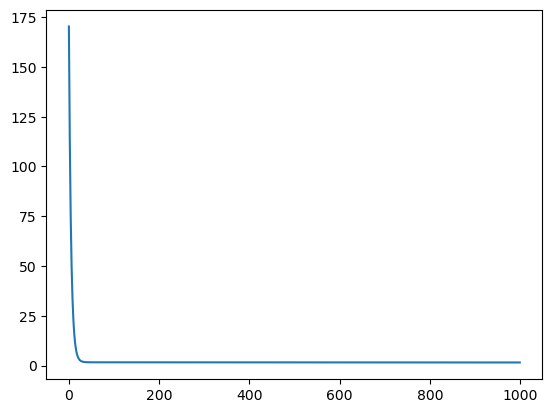

In [27]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [28]:
W, b

(array([0.04061498, 0.1575415 , 0.50160452, 0.58633256, 0.70489745,
        0.21542926, 0.3121429 , 0.24062638, 0.78179952, 0.44574801,
        0.52799212, 0.18794618]),
 np.float64(0.335164412888063))

In [29]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(0.9868237890660659)

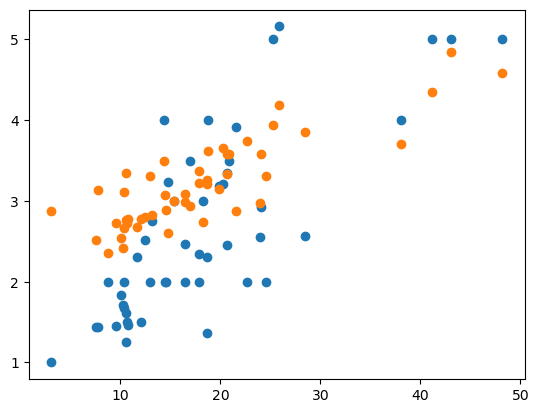

In [31]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## SKLEARN 라이브러리 활용

In [ ]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print("슝=3")

In [ ]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("슝=3")

In [ ]:
%%time
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
predictions

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

In [ ]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()